In [3]:
# 1. 라이브러리 및 데이터 불러오기

## 1-1 라이브러리

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.gridspec as gridspec

from matplotlib import font_manager, rc
import matplotlib
import platform
import matplotlib.pyplot as plt

%matplotlib inline 


if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
else:
    rc('font',family ='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

## 1-2 데이터 불러오기

# 데이터 불러오기
# 주문접수일시, 주문완료일시, 구매확정일시, 구매확정일, 출고지시일, 상태처리일시는 datetime64로 로딩
df_raw = pd.read_excel('data.xlsx',
                   sheet_name = None,
                  dtype = {'주문접수일시':'datetime64',
                           '주문완료일시':'datetime64',
                           '구매확정일시':'datetime64',
                           '출고지시일':'datetime64',
                           '상태처리일시':'datetime64'})

df = pd.concat(df_raw, ignore_index=True)

# 2. EDA

df.info()

df.shape

df.columns

# 삭제할 열의 인덱스 찾기 ( 유니크 값이 1개이면 삭제할 것임 )
del_index = []
for i in range(len(df.columns)):
    if len(df.iloc[:,i].unique())==1:
        del_index.append(i)
del_index

df.iloc[:,del_index].columns

# 모두 씨제이제일제당으로 삭제한다.
df['브랜드'].unique()

# 두 컬럼이 정확하게 일치하기 때문에 하나는 삭제한다.
(df['판매자단품명'] != df['전시단품명']).sum()

df.isna().sum()

# 결측치를 확인한다.
# 전시유입코드, 진행상태 (약식), 예외처리구분, 배송회차, 모델번호는 결측치가 너무 많아 분석 불가하다고 판단, 삭제
# 하지만 진행상태 (약식), 배송회차, 모델번호 는 이미 위에서 유니크값으로 제거 명단에 오름
# 롯데멤버스온/오프라인 고객번호는 6,7월에만 존재하고 의미가 따로 없다고 판단하여 삭제
# 회원번호 또한 8, 9월에만 존재하여 의미가 없다고 판단, 삭제
na_cols = ['전시유입코드', '예외처리구분', '롯데맴버스오프라인고객번호', '롯데맴버스온라인고객번호', '회원번호', '브랜드', '판매자단품명']

# 3. 데이터 전처리

# 분석에 필요한 컬럼 추가하기
df['주문액'] = df['판매가']*df['수량']
df['월'] = df['주문접수일시'].dt.month
df['일'] = df['주문접수일시'].dt.day
df['요일'] = df['주문접수일시'].dt.day_name()
df['시'] = df['주문접수일시'].dt.hour

df.info()

# 삭제할 컬럼 삭제
df = df.drop(df.columns[del_index], axis=1)
df = df.drop(na_cols, axis=1)

df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102077 entries, 0 to 102076
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   주문접수일시         102077 non-null  datetime64[ns]
 1   주문번호           102077 non-null  int64         
 2   유입매체           102077 non-null  object        
 3   주문구분           102077 non-null  object        
 4   유입채널           102077 non-null  object        
 5   회원구분           102077 non-null  object        
 6   아이디            98430 non-null   object        
 7   전시유입코드         89492 non-null   object        
 8   상품주문번호         102077 non-null  object        
 9   유형             102077 non-null  object        
 10  배송회수구분         102077 non-null  object        
 11  진행단계           102077 non-null  object        
 12  진행상태 (약식)      0 non-null       float64       
 13  구매확정           102077 non-null  object        
 14  주문완료일시         101745 non-null  datetime64[ns]
 15  

주문접수일시        0
주문번호          0
유입매체          0
주문구분          0
유입채널          0
회원구분          0
아이디        3647
상품주문번호        0
유형            0
배송회수구분        0
진행단계          0
구매확정          0
주문완료일시      332
구매확정일시     8482
출고지시일      8549
상태처리일시        0
전시상품명         0
전시단품명         0
판매자상품번호       0
판매자상품명        0
판매자단품번호       0
판매가           0
수량            0
표준카테고리        0
주문액           0
월             0
일             0
요일            0
시             0
dtype: int64

In [5]:
m_sum = pd.pivot_table(data=df,
                   index='월',
                   values='주문액',aggfunc='sum').reset_index()

m_sum

,월,주문액
0,1,133075747
1,2,44968578
2,3,119258980
3,4,103297653
4,5,353585139
5,6,646516214
6,7,494131772
7,8,987290226
8,9,216344255


<AxesSubplot:xlabel='월', ylabel='주문액'>

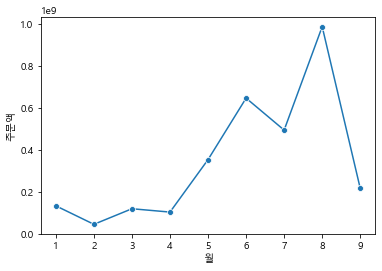

In [8]:
#월별 주문액 추이
sns.lineplot(data=m_sum, x='월',y='주문액',marker='o')

#8월 최대, 2월 최소

In [20]:
ww_sum = pd.pivot_table(data=df,
                   index='요일',
                   values='주문액',aggfunc='sum').reset_index()

w_sum = ww_sum.reindex(index=[1,5,6,4,0,2,3])

w_sum

,요일,주문액
1,Monday,458464818
5,Tuesday,296925075
6,Wednesday,631940556
4,Thursday,507220957
0,Friday,379851722
2,Saturday,335336804
3,Sunday,488728632


<AxesSubplot:xlabel='요일', ylabel='주문액'>

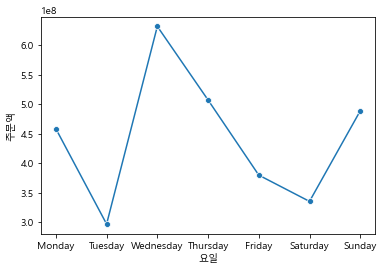

In [21]:
#요일별 주문액 추이
sns.lineplot(data=w_sum, x='요일',y='주문액', marker='o')

#수요일 최대, 화요일 최소

In [36]:
week = df.resample(rule='W').sum()

#더 자세한 분석을 위해 resample함수로 1주단위 주문액 추이 확인함

In [40]:
week

,주문번호,판매가,수량,주문액,월,일,시
주문접수일시,,,,,,,
2022-01-02,1.233426e+17,1195500.0,79.0,1484600.0,61.0,89.0,910.0
2022-01-09,2.598284e+18,26638830.0,2205.0,40189020.0,1285.0,9145.0,19811.0
2022-01-16,1.623675e+18,18819610.0,1655.0,38512990.0,803.0,9770.0,11485.0
2022-01-23,1.324418e+18,18803909.0,1217.0,33936222.0,655.0,12876.0,9677.0
2022-01-30,8.997956e+17,12113638.0,663.0,18559151.0,445.0,11244.0,6240.0
2022-02-06,3.437433e+17,3298254.0,260.0,3929752.0,322.0,1100.0,2396.0
2022-02-13,1.838017e+18,20720502.0,1071.0,22744411.0,1818.0,8651.0,12828.0
2022-02-20,4.367567e+17,4886498.0,285.0,5608840.0,432.0,3717.0,3129.0
2022-02-27,6.308710e+17,7802614.0,376.0,8709453.0,624.0,7504.0,4677.0


<AxesSubplot:xlabel='주문접수일시', ylabel='주문액'>

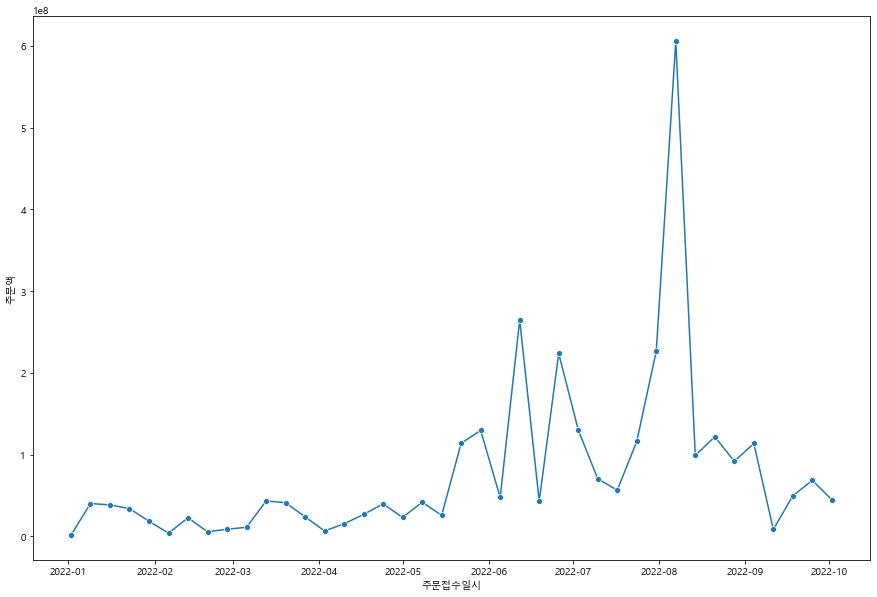

In [39]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=week, x='주문접수일시',y='주문액', marker='o')

#8월 둘째주의 매출이 급등한 것을 볼 수 있음

In [44]:
#8월 둘째주의 자세한 주문액 추이 파악을 위해 8월 일별 추이 그래프 그리기

df['일'] = df['주문접수일시'].dt.day

In [127]:
df_8 = df.loc[df['월']==8]
day8 = df_8.resample(rule='D').sum()
day8

,주문번호,판매가,수량,주문액,월,일,시
주문접수일시,,,,,,,
2022-08-01,1.055526e+18,15193948.0,608.0,16773788.0,4176.0,522.0,7764.0
2022-08-02,1.093945e+18,19030470.0,599.0,20263630.0,4328.0,1082.0,7882.0
2022-08-03,1.306871e+19,145342260.0,6909.0,154467120.0,51704.0,19389.0,115685.0
2022-08-04,4.284788e+18,63710148.0,2283.0,67105608.0,16952.0,8476.0,22355.0
2022-08-05,4.389937e+18,53557120.0,2318.0,56141710.0,17368.0,10855.0,26049.0
2022-08-06,8.335016e+18,87432930.0,4337.0,91347746.0,32976.0,24732.0,83347.0
2022-08-07,1.698143e+19,192912800.0,8789.0,200019090.0,67184.0,58786.0,91610.0
2022-08-08,1.528693e+18,21001570.0,841.0,22613820.0,6048.0,6048.0,12035.0
2022-08-09,1.178873e+18,16273308.0,658.0,17536412.0,4664.0,5247.0,8166.0


<AxesSubplot:xlabel='주문접수일시', ylabel='주문액'>

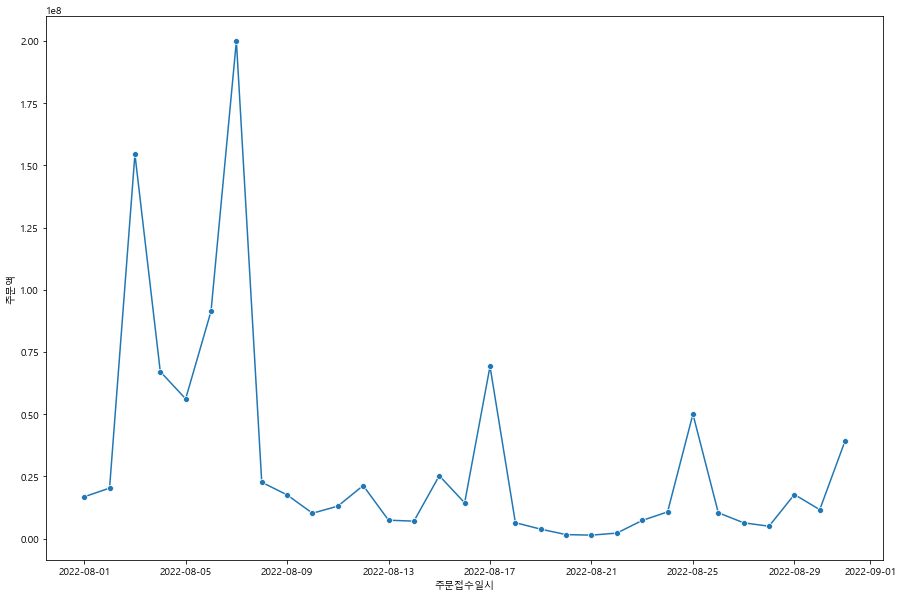

In [57]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=day8, x='주문접수일시',y='주문액', marker='o')

#8월 7일의 매출이 두드러지게 많은 것을 볼 수 있다

In [129]:
#count를 위해 c컬럼에 1을 넣어줌

df_8['c'] = 1

C:\Users\chaey\AppData\Local\Temp\ipykernel_25272\2444289935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8['c'] = 1


In [130]:
df_8_cate = df_8.groupby(df_8['표준카테고리'])['c'].count()
df_8_cate.sort_values(ascending=False).to_frame()

#즉석밥의 비율이 압도적으로 많음

,c
표준카테고리,
냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,11375
냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,4935
가공식품 > 통조림/캔 > 햄통조림,4664
냉장/냉동/간편식 > 떡볶이/만두 > 만두,2632
가공식품 > 식용유/오일 > 카놀라유,2247
냉장/냉동/간편식 > 돈가스/고로케/너겟 > 돈가스,1992
가공식품 > 장류 > 고추장/초고추장,788
가공식품 > 통조림/캔 > 캔/통조림선물세트,731
가공식품 > 소스/드레싱 > 기타소스,589


In [74]:
df_8['즉석밥'] = df_8['표준카테고리'].str.contains('즉석밥')

p11 = pd.pivot_table(data=df_8,
                   index='일',
                   values='즉석밥',aggfunc='sum')

p11

#8월 일별 즉석밥 주문량 확인

C:\Users\chaey\AppData\Local\Temp\ipykernel_25272\947949246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_8['즉석밥'] = df_8['표준카테고리'].str.contains('즉석밥')


,즉석밥
일,
1,139
2,292
3,526
4,693
5,1683
6,615
7,2468
8,425
9,199


<AxesSubplot:xlabel='일', ylabel='즉석밥'>

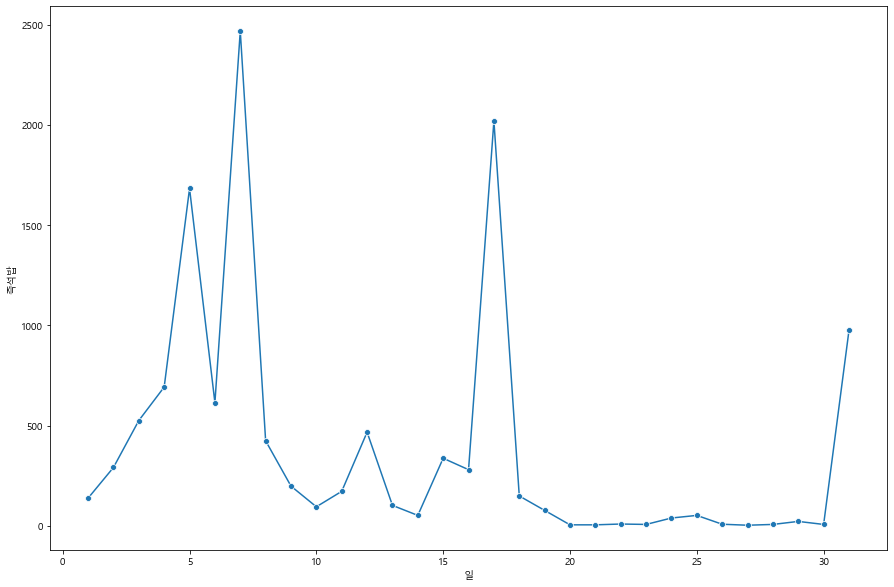

In [77]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=p11, x='일',y='즉석밥',marker='o')

#즉석밥의 8월 매출 추이만 봤을 때도 확실히 8월 7일의 매출이 높은 것을 확인할 수 있다

In [80]:
a = df_8.loc[df_8['표준카테고리'].str.contains('즉석밥')]
a

,주문접수일시,주문번호,유입매체,주문구분,유입채널,회원구분,아이디,상품주문번호,유형,배송회수구분,...,판매가,수량,표준카테고리,주문액,월,일,요일,시,c,즉석밥
주문접수일시,,,,,,,,,,,,,,,,,,,,,
2022-08-31 23:59:38,2022-08-31 23:59:38,2022083115013741,APP,일반주문,디폴트 채널상세,LPOINT통합회원,rosa0309,2022083115013741_1,주문,배송,...,33000,2,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,66000,8,31,Wednesday,23,1,True
2022-08-31 23:59:34,2022-08-31 23:59:34,2022083115013721,APP,일반주문,디폴트 채널상세,LPOINT통합회원,sor28,2022083115013721_1,주문,배송,...,33000,1,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,33000,8,31,Wednesday,23,1,True
2022-08-31 23:59:16,2022-08-31 23:59:16,2022083115013568,APP,일반주문,디폴트 채널상세,LPOINT통합회원,8234pooh,2022083115013568_1,주문,배송,...,26000,1,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,26000,8,31,Wednesday,23,1,True
2022-08-31 23:59:00,2022-08-31 23:59:00,2022083115013483,APP,선물하기,디폴트 채널상세,LPOINT통합회원,kjsland,2022083115013483_1,주문,배송,...,26000,1,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,26000,8,31,Wednesday,23,1,True
2022-08-31 23:58:57,2022-08-31 23:58:57,2022083115013468,MO WEB,일반주문,유실 채널상세,LPOINT통합회원,howkim,2022083115013468_1,주문,배송,...,26000,1,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,26000,8,31,Wednesday,23,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01 01:32:37,2022-08-01 01:32:37,2022080111174704,APP,일반주문,디폴트 채널상세,LPOINT통합회원,asnu07125,2022080111174704_1,주문,배송,...,46000,1,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,46000,8,1,Monday,1,1,True
2022-08-01 01:18:02,2022-08-01 01:18:02,2022080111173431,PC,일반주문,유실 채널상세,LPOINT통합회원,kmkyu,2022080111173431_1,주문,배송,...,85700,1,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,85700,8,1,Monday,1,1,True
2022-08-01 01:07:29,2022-08-01 01:07:29,2022080111172321,APP,일반주문,디폴트 채널상세,LPOINT통합회원,hslove12,2022080111172321_1,주문,배송,...,14000,2,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,28000,8,1,Monday,1,1,True


In [131]:
df_8_b = a.groupby(a['전시상품명'])['c'].count()
df_8_b.sort_values(ascending=False).to_frame().head(10)

#[L.Point 3,000p 증정]햇반 오곡밥 24입/ 솥반 7종 골라담기 [ 택 1] 
#큼직한 프로모션이 두 개(서울체크인, 배그에디션)
#상위 5개의 제품이 모두 햇반

,c
전시상품명,
"[L.Point 3,000p 증정]햇반 오곡밥 24입/ 솥반 7종 골라담기 [ 택 1]",2032
[CJ직배송] CJ 햇반 백미 210g x 36개,1602
[햇반 솥반 X 서울체크인]햇반 솥반 7종,1442
"[컵반 배그에디션]이겼닭 오늘 저녁은 치킨이닭(컵반 1개당 G코인 100~10,000코인 랜덤 증정)",1110
[CJ직배송] New 햇반 210g*3입X 8개(총24개),792
이겼닭 오늘 저녁은 치킨이닭(컵반 배틀그라운드),613
[전참시 속 보양식사]누룽지닭백숙죽/전복삼계죽/녹두닭죽 外 + 보양닭백숙죽 증정,534
[CJ직배송]햇반 흑미밥 210gX36개[1박스],522
"[L.Point 5,000p 증정]햇반 오곡밥 24입/ 솥반 7종 골라담기 [ 택 1]",345


In [119]:
c = a.loc[a['전시상품명']=='[L.Point 3,000p 증정]햇반 오곡밥 24입/ 솥반 7종 골라담기 [ 택 1]']
c['판매가'].unique()

array([27500, 36000], dtype=int64)

In [125]:
cc = c.groupby(c['판매가'])['c'].count()
cc.to_frame()

#현재는 36000원에 판매중
#36000원에 구매한 소비자도 있지만 그보다 많은 사람들이 27500원에 구매.
#위 상품을 8500원, 약 23% 할인한 것이 매출 상승의 큰 요인으로 보임

,c
판매가,
27500,1050
36000,982
